## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Read and display first entries of dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# Number of rows in the dataset excluding the headers' column
df.shape[0]-1

294477

c. The number of unique users in the dataset.

In [4]:
# The counts of unique values having unique User IDs
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
# The proportion of users who converted to the new landing page
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Number of mismatches between the old landing page and the treatment group
mis_1 = df.query('group == "treatment" & landing_page == "old_page"')
len(mis_1)

1965

In [7]:
# Number of mismatches between the new landing page and the control group
mis_2 = df.query('group == "control" & landing_page == "new_page"')
len(mis_2)

1928

In [8]:
# Total number of mismatches
mis = mis_1 + mis_2
len(mis)

3893

f. Do any of the rows have missing values?

In [9]:
# Display info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


> None of the rows have missing values.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Drop mismatched entries and store in a new dataframe
df2 = df.drop(mis.index)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
# Test that the mismatched entries have been succesffully dropped
df2.query(('group == "treatment" & landing_page == "old_page"') or ('group == "control" & landing_page == "new_page"')).shape[0]

0

> Mismatched entries successfully dropped

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
# Display the number of unique User IDs in the new dataframe
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# Display duplicated entries
df2[df2.duplicated('user_id', keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
# Display the row information for duplicated entries
df2[df2.duplicated('user_id', keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# Remove the second duplicated entry
df2 = df2.drop_duplicates(subset = 'user_id', keep='first')

In [16]:
# Test that the duplicated entry has been dropped
df2[df2.duplicated('user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted


> Duplicated entry successfully dropped

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# Probability of conversion regardless of the page
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# Probability of conversion given that the individual was the control group
orig_control_mean = df2[df2['group'] == 'control']['converted'].mean()
orig_control_mean

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# Probability of conversion given that the individual was the treatment group
orig_treatment_mean = df2[df2['group'] == 'treatment']['converted'].mean()
orig_treatment_mean

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
# Probability that an individual received the new page
len(df2[df2['landing_page'] == 'new_page'])/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

> The results derived from descriptive statistics above do not indicate sufiicient evidence that the new treatment page leads to a higher rate of conversion. In fact, the results have shown that 12.0% conversion rate in the control group compared to only 11.9% in the treatment group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$**: **$p_{old}$** - **$p_{new}$** >= 0 <br>
**$H_{1}$**: **$p_{old}$** - **$p_{new}$** < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
# Conversion rate for pnew
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
# Conversion rate for pold
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
# Number of individuals in the treatment group
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
# Number of individuals in the treatment group
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
# Simulating the conversion rate by using a binomial function for pnew and nnew
new_page_converted = np.random.binomial(1, p_new, size = n_new)
new_page_converted.mean()

0.11822999105360953

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
# Simulating the conversion rate by using a binomial function for pold and nold
old_page_converted = np.random.binomial(1, p_old, size = n_old)
old_page_converted.mean()

0.12041383867725815

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# Difference in the conversion rate between the above two simulations
new_page_converted.mean() - old_page_converted.mean()

-0.0021838476236486215

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
# Create an empty list and simulate 10,000 simulations for the difference in means
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.binomial(1, p_new, size = n_new)
    old_page_converted = np.random.binomial(1, p_old, size = n_old)
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

In [29]:
# Store p_diffs in a NumPy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

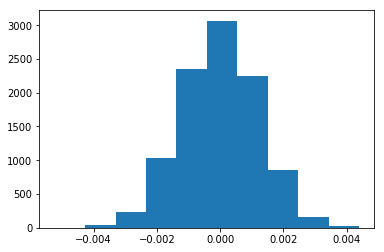

In [30]:
# Plot Histogram of mean differences
plt.hist(p_diffs);

> The plot looks normally distributed which follows the Central Limit Theorem which states that for a large enough sample the sample means, or the difference in sample means as in our case, will be normally distributed.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# Propotion of original differences from the dataset
orig_diff = orig_treatment_mean - orig_control_mean
orig_diff

-0.0015782389853555567

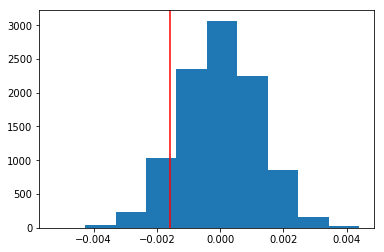

In [32]:
# Plot the orig_diff onto the 
plt.hist(p_diffs);
plt.axvline(orig_diff, c= 'red');

In [33]:
# The proportion of p_diffs greater than orig_diff
(p_diffs>orig_diff).mean()

0.90249999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> The value computed above is the p-value. This value denotes the probaiblity of observing  the statistic if the null hypothesis is true. Assuming a Type I value error of 5% and at such high value, there is a high probability of observing the null hypothesis and hence we fail to reject the null. The results suggest no difference between the old page and the new one.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm;

convert_old = len(df2.query('converted == True & landing_page == "old_page"'))
convert_new = len(df2.query('converted == True & landing_page == "new_page"'))
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
# Run a z test and display z score and p-value
stat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
stat, pval

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> For a z score of 1.3, the p-value observed is 0.905. This value is very close to one computed with the bootstrapping above. At such value, there is a high probability of observing the statistic if the null hypothesis is true. At such high p-value, we fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> As the dependant variable (conversion) is categorical, logistic regression shall be used instead of simple or multiple linear regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# Add Intercept
df2['intercept'] = 1

# Create Dummies for the control and treatment group
df2[['control','treatment']] = pd.get_dummies(df2['group'])

# Rename treatment column
df2.rename(columns = {'treatment':'ab_page'}, inplace=True)

# Display the dataframe
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [37]:
# Drop one of the countries columns to ensure that the regression analysis is fully ranked
df2.drop('control', axis=1, inplace=True)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
# Run logistic regression analysis and fit model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
# Display logistic regression analysis summary
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-08 22:18 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [40]:
# Exponentiate the results
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [41]:
# Inverse the negative exponent's power results
1/np.exp(results.params[1:2])

ab_page    1.015102
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

> The p-value associated with the regression model is 0.189. It is greater than the assumed Type I error (0.05) and hence the results are not statistically significant. The p-value in part II is different due to the difference in the hypotheses in comparison to the part I. Logistic regression deduces the significance test results for a zero slope for the null hypothesis. This leads to utilising a one-tailed test in part II instead of a two-tailed in part II. The Hypothesis used for the regression are shown below:<br> **$H_{0}$**: **$p_{old}$** = **$p_{new}$** <br>
**$H_{1}$**: **$p_{old}$** ≠ **$p_{new}$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Adding other factors such as the timestamp, change aversion or novelty effect metric of the user, and other customer segmentation features such as geographical and demographical features would lead to more beneficial A/B testing results. This would however come at an increased cost and would lead to further complexities in interpreting the model. This could also lead to inaccurate testing results if multicollinearity exists among the independent variables.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
# Read the countries file and display dataframe
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
# Display the unique countries
df_countries['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [44]:
# Create new dataframe and add the countries column to the original dataframe
df3 = df2.join(df_countries['country'])

# Create Dummies for the control and treatment group
df3[['US', 'UK', 'CA']] = pd.get_dummies(df3['country'])

# Add Intercept
df3['intercept'] = 1

In [45]:
# Drop one of the countries columns to ensure that the regression analysis is fully ranked
df3.drop('CA', axis = 1, inplace = True)

In [46]:
# Display the new dataframe
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,UK,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,UK,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,UK,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,UK,0,1


In [47]:
# Run logistic regression analysis and fit model
log_mod_2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'UK']])
results_2 = log_mod_2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [48]:
# Display logistic regression analysis summary
results_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-08 22:18 AIC:              212783.0474
No. Observations:   290584           BIC:              212825.3660
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9891    0.0089  -224.0205  0.0000  -2.0065  -1.9717
ab_page      -0.0150    0.0114    -1.3084  0.1907  -0.0374   0.0074
US           -0.0258    0.0269    -0.9589  0.3376  -0.0785   0.0269
UK            0.0065    0.0134     0.4850  0.6277  -0.0197   0.0327
==================================================================

"""

In [49]:
# Exponentiate the results
np.exp(results_2.params)

intercept    0.136814
ab_page      0.985151
US           0.974541
UK           1.006502
dtype: float64

In [50]:
# Inverse the negative exponent's power results
1/np.exp(results_2.params[:3])

intercept    7.309186
ab_page      1.015073
US           1.026124
dtype: float64

> The above results show that the p-values for both the US and UK are greater than 0.05. We fail to reject the null due to the lack of statistical significance. This means that the country of the user does not have an impact on the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,UK,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,UK,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,UK,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,UK,0,1


In [52]:
df3['us_int'] = df3['ab_page']*df3['US']
df3['uk_int'] = df3['ab_page']*df3['UK']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,us_int,uk_int
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,UK,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,UK,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,UK,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,UK,0,1,0,0


In [53]:
# Run logistic regression analysis and fit model
log_mod_3 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'US', 'us_int', 'UK', 'uk_int']])
results_3 = log_mod_3.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [54]:
# Display logistic regression analysis summary
results_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-06-08 22:18 AIC:              212784.6547
No. Observations:   290584           BIC:              212848.1326
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9859    0.0096  -206.7920  0.0000  -2.0047  -1.9670
ab_page      -0.0215    0.0136    -1.5817  0.1137  -0.0482   0.0052
US           -0.0675    0.0385    -1.7528  0.0796  -0.1430   0.0080
us_int        0.0825    0.0538     1.5339  0.1251  -0.0229   0.1880
UK            0.0013    0.0188     0.0669  0.9467  -0.0356   0.0381
uk_int        0.0105    0.0267     0.3937  0.6938  -0.0419   0.0629
==================================================================

"""

In [55]:
# Exponentiate the results
np.exp(results_3.params)

intercept    0.137263
ab_page      0.978684
US           0.934719
us_int       1.086035
UK           1.001259
uk_int       1.010578
dtype: float64

In [56]:
# Inverse the negative exponent's power results
1/np.exp(results_3.params[1:3])

ab_page    1.021780
US         1.069841
dtype: float64

> Adding the interaction variable between the ab_page and country has  returned a correlation factor of 0 similar to the one computed without the interaction. The exponentiated results show negligible changes in the conversion rates. Finally, the p-values for all variables are greater than 0.05 which still indicates a lack of statistical significance and hence we fail to reject the null hypothesis.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0